# TextVQA Dataset Analysis

In this notebook, we will take a look at the dataset of textvqa. We will analyze the results of baseline LoRRA algorithm on this dataset. This will give us hints on improving the algorithm


### Image validation set



In [1]:
!wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_val.json

--2019-07-07 05:48:05--  https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_val.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15782960 (15M) [text/plain]
Saving to: ‘TextVQA_0.5_val.json’

TextVQA_0.5_val.jso 100%[===================>]  15.05M  94.6MB/s    in 0.2s    

2019-07-07 05:48:06 (94.6 MB/s) - ‘TextVQA_0.5_val.json’ saved [15782960/15782960]



### Baseline result.

Let's get the baseline results from already uploaded results file from my [github](https://raw.githubusercontent.com/mandliya/textvqa/master/result.json).

In [2]:
!wget https://raw.githubusercontent.com/mandliya/textvqa/master/result.json

--2019-07-07 05:48:11--  https://raw.githubusercontent.com/mandliya/textvqa/master/result.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235268 (230K) [text/plain]
Saving to: ‘result.json’

result.json         100%[===================>] 229.75K  --.-KB/s    in 0.03s   

2019-07-07 05:48:11 (7.97 MB/s) - ‘result.json’ saved [235268/235268]



### Analysis

In [3]:
import pandas as pd

results = pd.read_json('result.json')
results.head()

answer  question_id
0      the moon        38533
1           yes        35812
2  unanswerable        38213
3             6        36121
4  unanswerable        37023

In [4]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
answer         5000 non-null object
question_id    5000 non-null int64
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [5]:
val = pd.read_json('TextVQA_0.5_val.json')
val.head()

dataset_type  ...                                               data
0          val  ...  {'question': 'what is the brand of this camera...
1          val  ...  {'question': 'what does the small white text s...
2          val  ...  {'question': 'what kind of beer is this?', 'im...
3          val  ...  {'question': 'what brand liquor is on the righ...
4          val  ...  {'question': 'how long has the drink on the ri...

[5 rows x 4 columns]

In [0]:
val.drop(['dataset_type', 'dataset_name', 'dataset_version'], axis=1, inplace=True)

In [7]:
val.data[0]

{'answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  'dakota digital',
  'dakota',
  'dakota'],
 'flickr_300k_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'flickr_original_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'image_classes': ['Cassette deck',
  'Printer',
  'Medical equipment',
  'Computer mouse',
  'Scale',
  'Telephone',
  'Camera',
  'Ipod',
  'Remote control'],
 'image_height': 664,
 'image_id': '003a8ae2ef43b901',
 'image_width': 1024,
 'ocr_info': [{'bounding_box': {'height': 0.071707926690578,
    'pitch': 0,
    'roll': 0,
    'rotation': 0,
    'top_left_x': 0.14370192587376,
    'top_left_y': 0.1531290858984,
    'width': 0.12223755568266,
    'yaw': 0.92349565029144},
   'word': 'DAKOTA'},
  {'bounding_box': {'height': 0.06244381517171901,
    'pitch': 0,
    'roll': 0,
    'rotation': 0,
    'top_left_x': 0.26033261418343,
    'top_left_y': 0.174

### Normalize the json

In [0]:
from pandas.io.json import json_normalize
val = json_normalize(val.data)

In [9]:
val.head()

answers  ... set_name
0  [nous les gosses, dakota, clos culombu, dakota...  ...      val
1  [copenhagen, copenhagen, copenhagen, copenhage...  ...      val
2  [ale, sublimely self-righteous ale, stone, ale...  ...      val
3  [bowmore , bowmore, bowmore, bowmore, bowmore,...  ...      val
4  [10 years, 10 year, 10 years, 10 years , 10 ye...  ...      val

[5 rows x 13 columns]

## Merge the dataset with results

In [10]:
val = pd.merge(val, results, on='question_id')
val.head()

answers  ...        answer
0  [nous les gosses, dakota, clos culombu, dakota...  ...       samsung
1  [copenhagen, copenhagen, copenhagen, copenhage...  ...         alcon
2  [ale, sublimely self-righteous ale, stone, ale...  ...      kilkenny
3  [bowmore , bowmore, bowmore, bowmore, bowmore,...  ...  unanswerable
4  [10 years, 10 year, 10 years, 10 years , 10 ye...  ...        sherry

[5 rows x 14 columns]

In [0]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt

def open_image(url):
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.show()
        return True
    else:
        print("Can't open image url:", url)
        return False

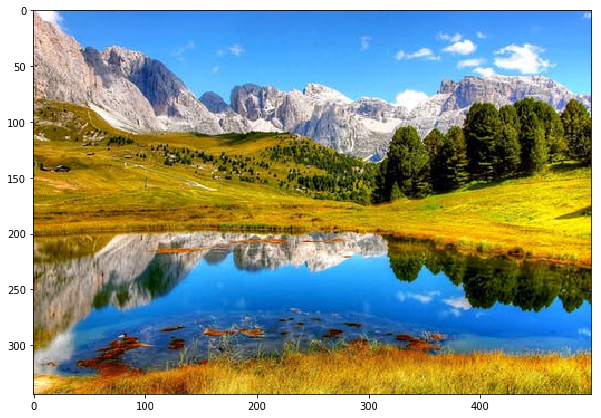

True

In [14]:
open_image('https://images.pexels.com/photos/371589/pexels-photo-371589.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500')

### Let's analyze few images and their results

In [0]:
def analyze_result(row):
    if not open_image(row['flickr_300k_url']):
        open_image(row['flickr_original_url'])
    display(HTML("<h3>Question:<h3>"))
    display(HTML(row.question))
    display(HTML("<h3>Answer by LoRRA<h3>"))
    display(HTML(row.answer))
    display(HTML("<h3>Human Answers in validation set:<h3>"))
    for answer in row.answers:
      print(answer)
    display(HTML("<h3>Question tokens in validation set: <h3>"))
    for token in row.question_tokens:
      print(token)
    display(HTML("<h3>OCR tokens in validation set: <h3>"))
    if len(row.ocr_tokens) > 0:
        for token in row.ocr_tokens:
            print(token)
    else:
        display(HTML('None'))
    display(HTML('<hr>'))
    #print(row.ocr_info)

    

In [0]:
val_subset = val.sample(10)

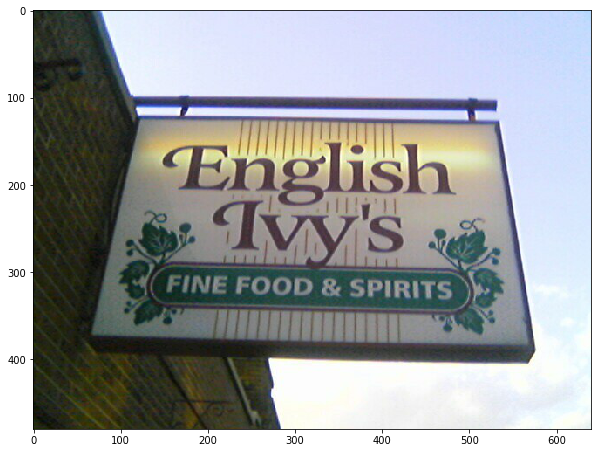

english ivy's
english ivy's
english ivy's
english ivy's 
english ivy's
english ivy's
english ivy's
english ivy's fine food & spirits
english ivy's
english ivy's


what
is
the
name
of
the
establishment


English
Ivy's
קשן
FINE
FOOD
&
SPIRITS



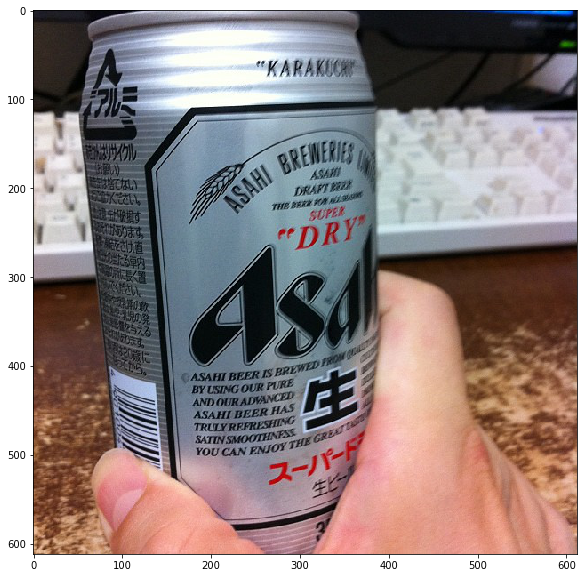

draft beer
beer
draft beer
asahi beer
super dry
beer
sake
draft beer
asahi draft beer 
draft beer


what
kind
of
drink
is
in
the
can


"KARAKUCK
카트
WAl
BRENERIES
ASAHII
1S.H
UPER
"DRY
ASA
BREWED
HE
ASAHI
BEER
BYUSING
ED
HAS
BREWED
HE
TAY
SATINS
CAN
ENJOY
YOU
CAN
ENJOY
거다
THE


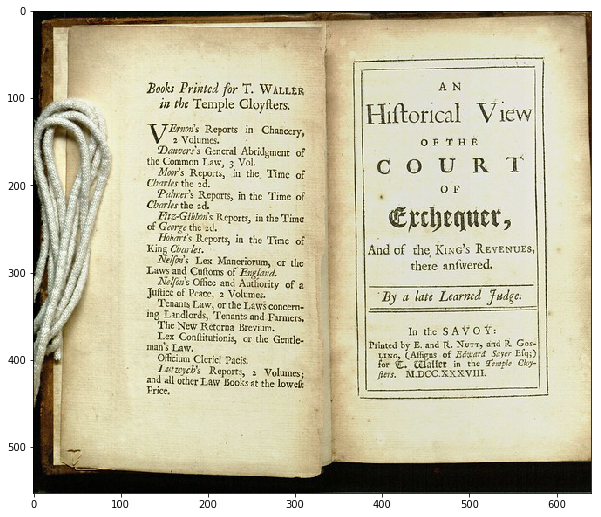

nixon
the learned judge
learned judge
learned judge
learned judge
learned judge
fudge
leonard judge
unanswerable
learned fudge


who
is
late


Books
Printed
for
WALLER
AN
the
Temple
Cloyfters.
TErnon's
Reports
Chancery,
Hiftorical
View
Volumes.
Dangers
General
Abridgment
Reports,
Time
T
Reports,
Time
OF
Reports,
Time
Tg
Exchequer,
the
KingCbar
And
of
the,
KING's
REVENUES,
Maneriorum,
there
anfwered.
Authority
England.
Juftice
Volumes.
late
Learned
Fudge.
concern-
heNew
Retorna
Conftitutionis,
Gentle-
In
Printedby
E.nd
Efq;)
Caller
Temple
Volumes;
M.DCC.XXXVII
Price.


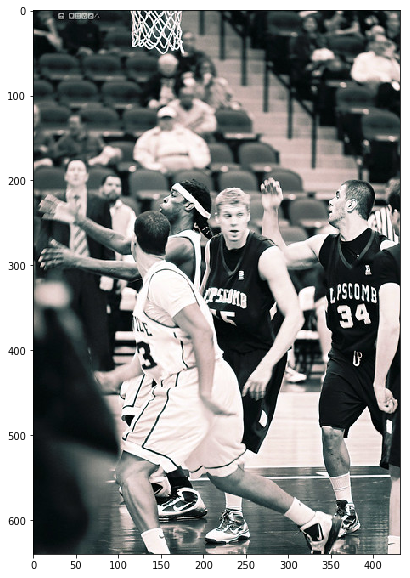

lipscomb
lipscomb
lipscomb
lipscomb
lfs comb
lipscomb
upscomb
lpscomb 
lipscomb
lipscomb


what
team
is
playing


ല0ඹO
L
PSCOMB
34
U


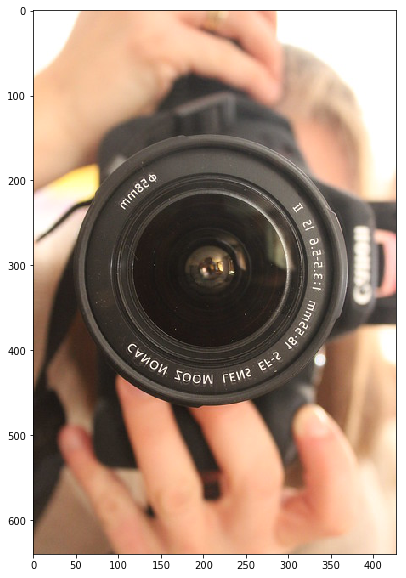

canon
canon
canon
canon
canon
canon
canon
unanswerable
canon
canon


what
is
the
brand
of
the
camera
lens


mdee
2
அ

суиои
SOOW
геиг
타L-2


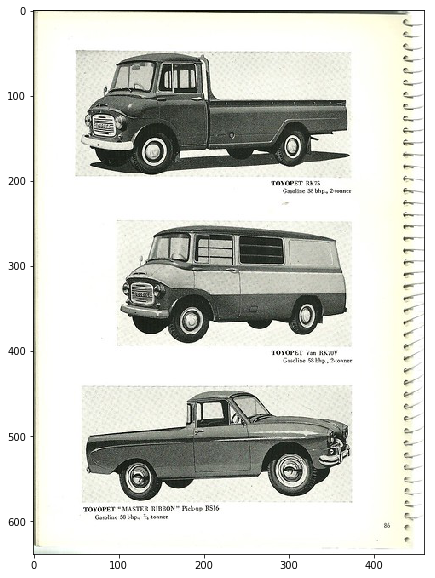

toyopet rk75
toyopet rk75
toyopet rk75
toyopet rk75
1337
toyopet rk75
toyopet
toyopet rk75
toyopet rk75
toyopet


what
is
the
top
truck


TOYOPET
RK75
soline
58bhp.,
TOYOPET
Van
RK70V
Gasoline
2-tonner
TOYOPET
MASTER
RIBBON
Pick-up
RS16
Gasoline
58bhp-,
-tonner


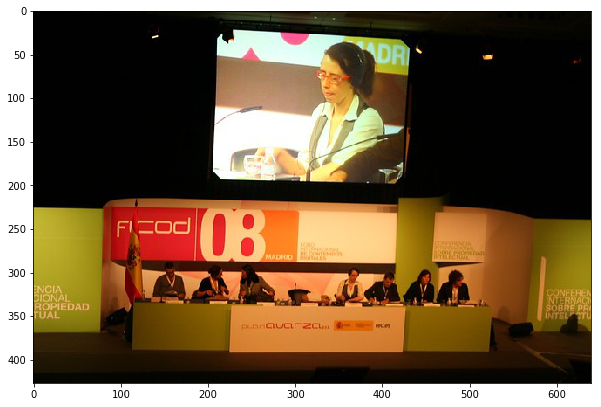

ficod
08
08 madrid
08
ficod
ficod 08 madrid
cod 08
08
08 madrid
madrid


what
does
the
backboard
behind
the
committee
say


DR
FI
=Od
08
MADRID
NCIA
OPIEDAD
UAL
plan
QUar
2C.,
red.es


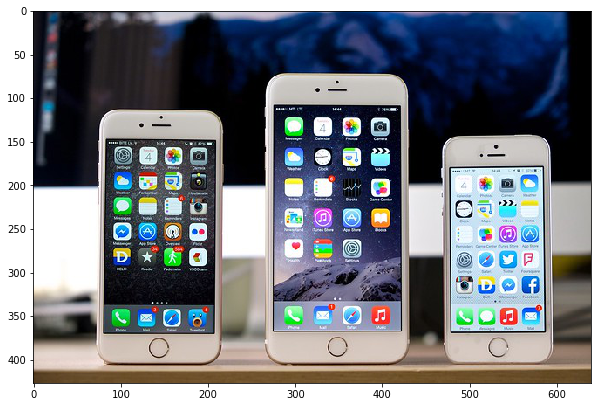

14:44
14:44
unanswerable
14:44
unanswerable
apple
1444
11:41
11:44
unanswerable


what
time
is
it
on
the
phone
in
the
middle


•
•
J
J


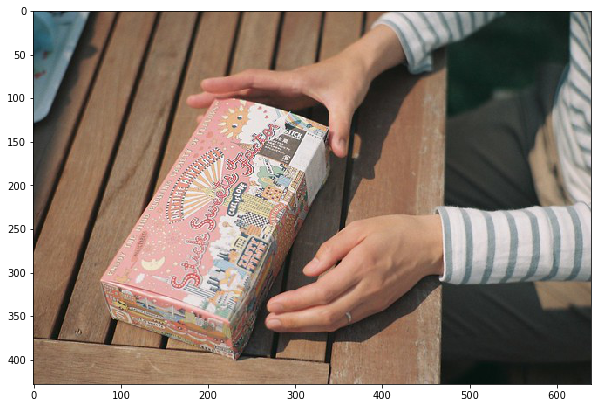

cake
cake
stick sweets
stick sweets factor
cake
cake
cake
cake
cake
cake


what
does
the
box
say
is
love


STICK
Sweet
CAKLISLOVE
C
ek
AN
TTME


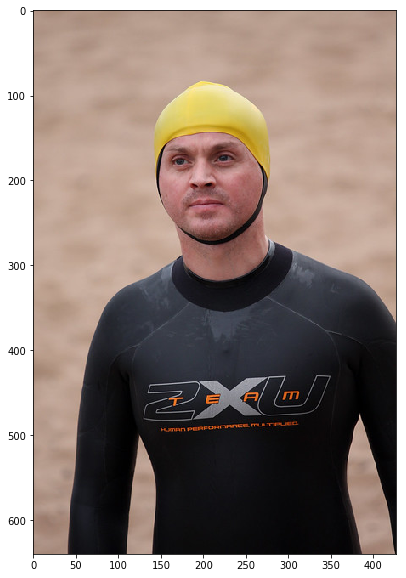

human performance multiplied
human performance multiplier
human performance multiplied
human performance multiplier 
team
human performance multiplied
1969
human performance multiplied
team
human performance multiplied.


what
is
written
under
the
2xu
logo


A
JEO
HUMAN
P


3558    None
2030    None
1867    None
2035    None
627     None
3005    None
1835    None
3859    None
2707    None
1281    None
dtype: object

In [28]:
val_subset.apply(analyze_result, axis=1)